# Time Series Analysis Course Project

Submitted By:

Name: Mahmud Hasan Khan

ID: 2025-1-83-005

Submitted To: Professor Dr. Md. Rezaul Karim

Submitted Date: 2025-12-07

In [35]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import probplot, shapiro

In [36]:
df = pd.read_csv("timeseries_project_data.csv", index_col='Date')
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
01-01-19,102.48,412.81,1002.87,5.50
31-01-19,108.16,428.78,1000.64,5.69
02-03-19,118.94,445.10,1005.35,5.37
01-04-19,126.68,484.60,1001.65,5.09
01-05-19,117.24,555.58,1003.91,5.36


In [37]:
df.index = pd.to_datetime(df.index, format='%d-%m-%y')

df.index = df.index + pd.Timedelta(days=5)

df.index = df.index.to_period('M').to_timestamp()
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
2019-01-01,102.48,412.81,1002.87,5.50
2019-02-01,108.16,428.78,1000.64,5.69
2019-03-01,118.94,445.10,1005.35,5.37
2019-04-01,126.68,484.60,1001.65,5.09
2019-05-01,117.24,555.58,1003.91,5.36


In [38]:
df.to_csv("df_timestamp_change.csv", index=True)

In [39]:
df = pd.read_csv('df_timestamp_change.csv', index_col='Date', parse_dates=True)
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
2019-01-01,102.48,412.81,1002.87,5.50
2019-02-01,108.16,428.78,1000.64,5.69
2019-03-01,118.94,445.10,1005.35,5.37
2019-04-01,126.68,484.60,1001.65,5.09
2019-05-01,117.24,555.58,1003.91,5.36


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-11-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Retail_Sales        60 non-null     float64
 1   Energy_Consumption  60 non-null     float64
 2   Stock_Price_Index   60 non-null     float64
 3   Unemployment_Rate   60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [41]:
df.describe()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
count,60.000000,60.000000,60.000000,60.000000
mean,139.226667,524.944667,1013.850167,5.553167
std,24.634848,61.623736,11.719017,0.427010
min,95.510000,412.810000,1000.630000,4.930000
25%,117.420000,472.660000,1004.917500,5.272500
50%,138.475000,527.545000,1008.725000,5.435000
75%,159.247500,580.400000,1022.325000,5.692500
max,182.420000,651.150000,1046.540000,6.820000


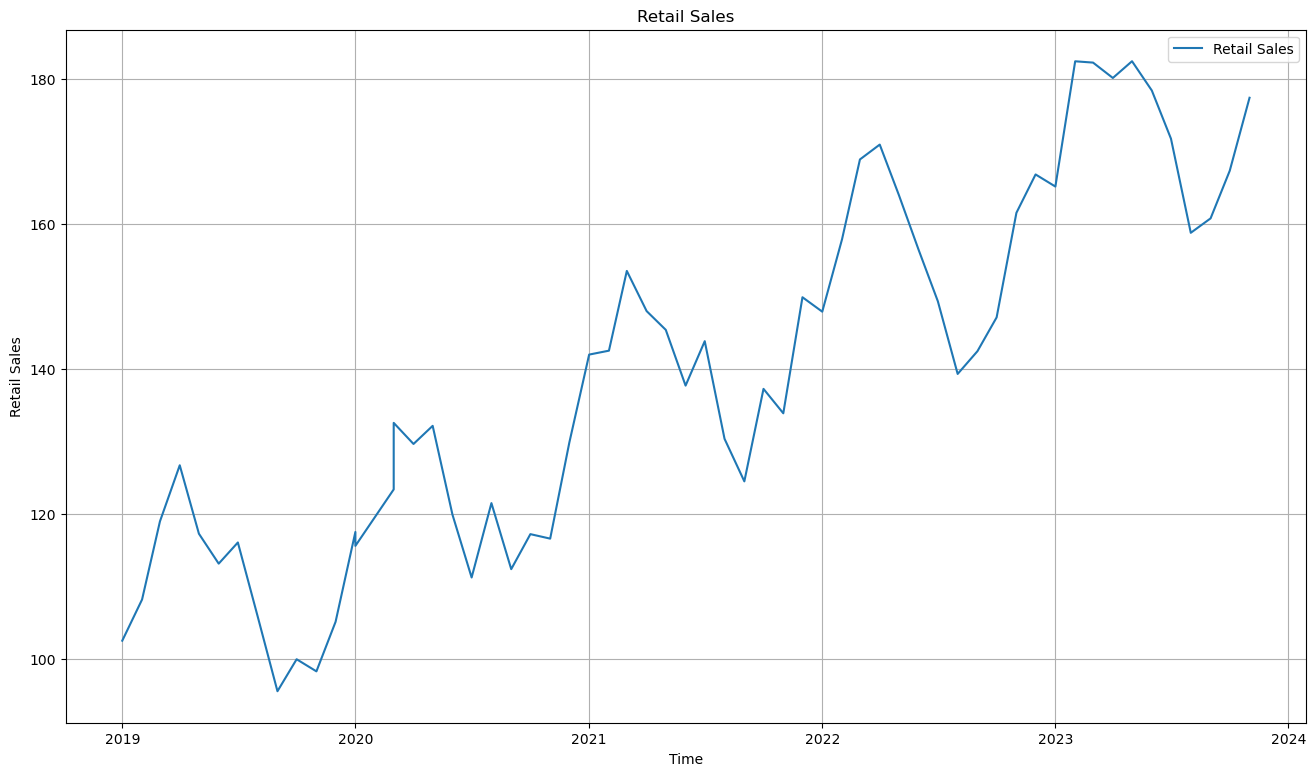

In [42]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Retail_Sales'], label='Retail Sales')
plt.title('Retail Sales')
plt.xlabel('Time')
plt.ylabel('Retail Sales')
plt.grid(True)
plt.legend()
plt.show()


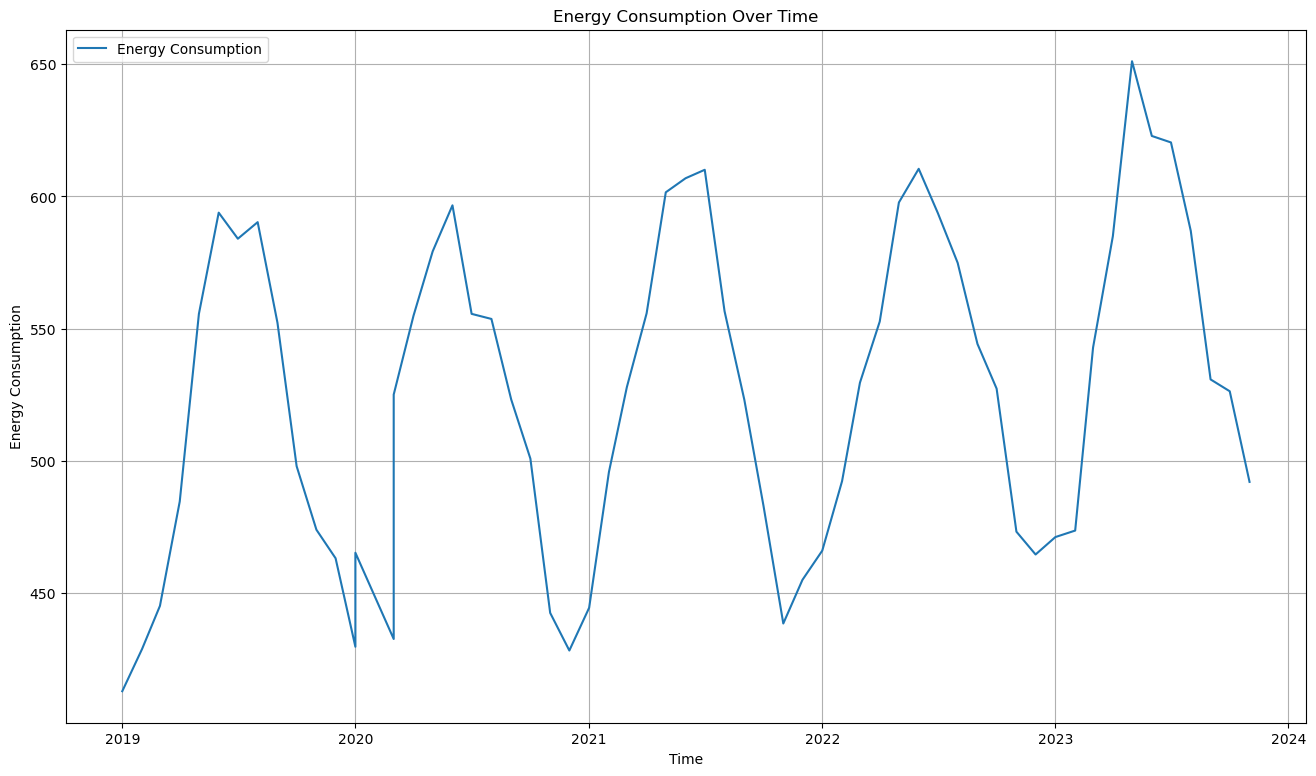

In [43]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Energy_Consumption'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.legend()
plt.show()

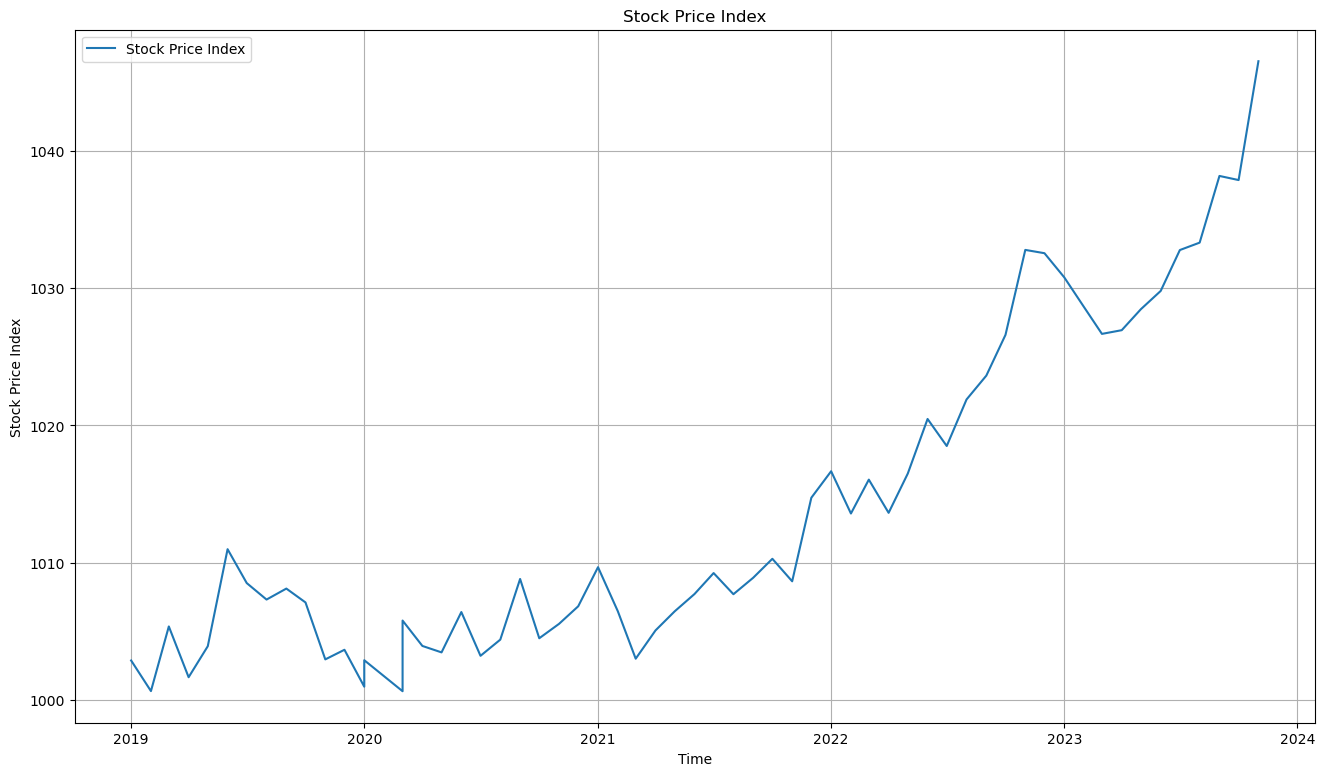

In [44]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Stock_Price_Index'], label='Stock Price Index')
plt.title('Stock Price Index')
plt.xlabel('Time')
plt.ylabel('Stock Price Index')
plt.grid(True)
plt.legend()
plt.show()

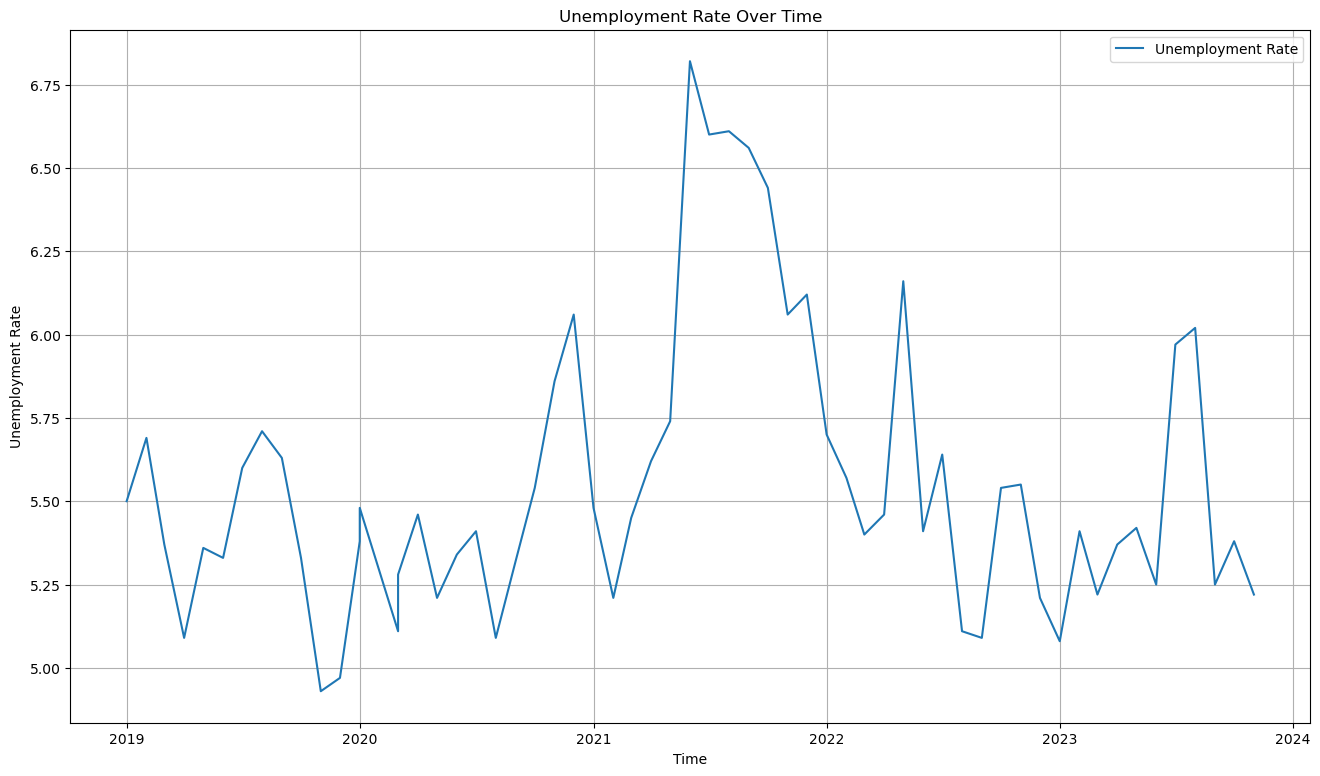

In [45]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Unemployment_Rate'], label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
df.describe()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
count,60.000000,60.000000,60.000000,60.000000
mean,139.226667,524.944667,1013.850167,5.553167
std,24.634848,61.623736,11.719017,0.427010
min,95.510000,412.810000,1000.630000,4.930000
25%,117.420000,472.660000,1004.917500,5.272500
50%,138.475000,527.545000,1008.725000,5.435000
75%,159.247500,580.400000,1022.325000,5.692500
max,182.420000,651.150000,1046.540000,6.820000


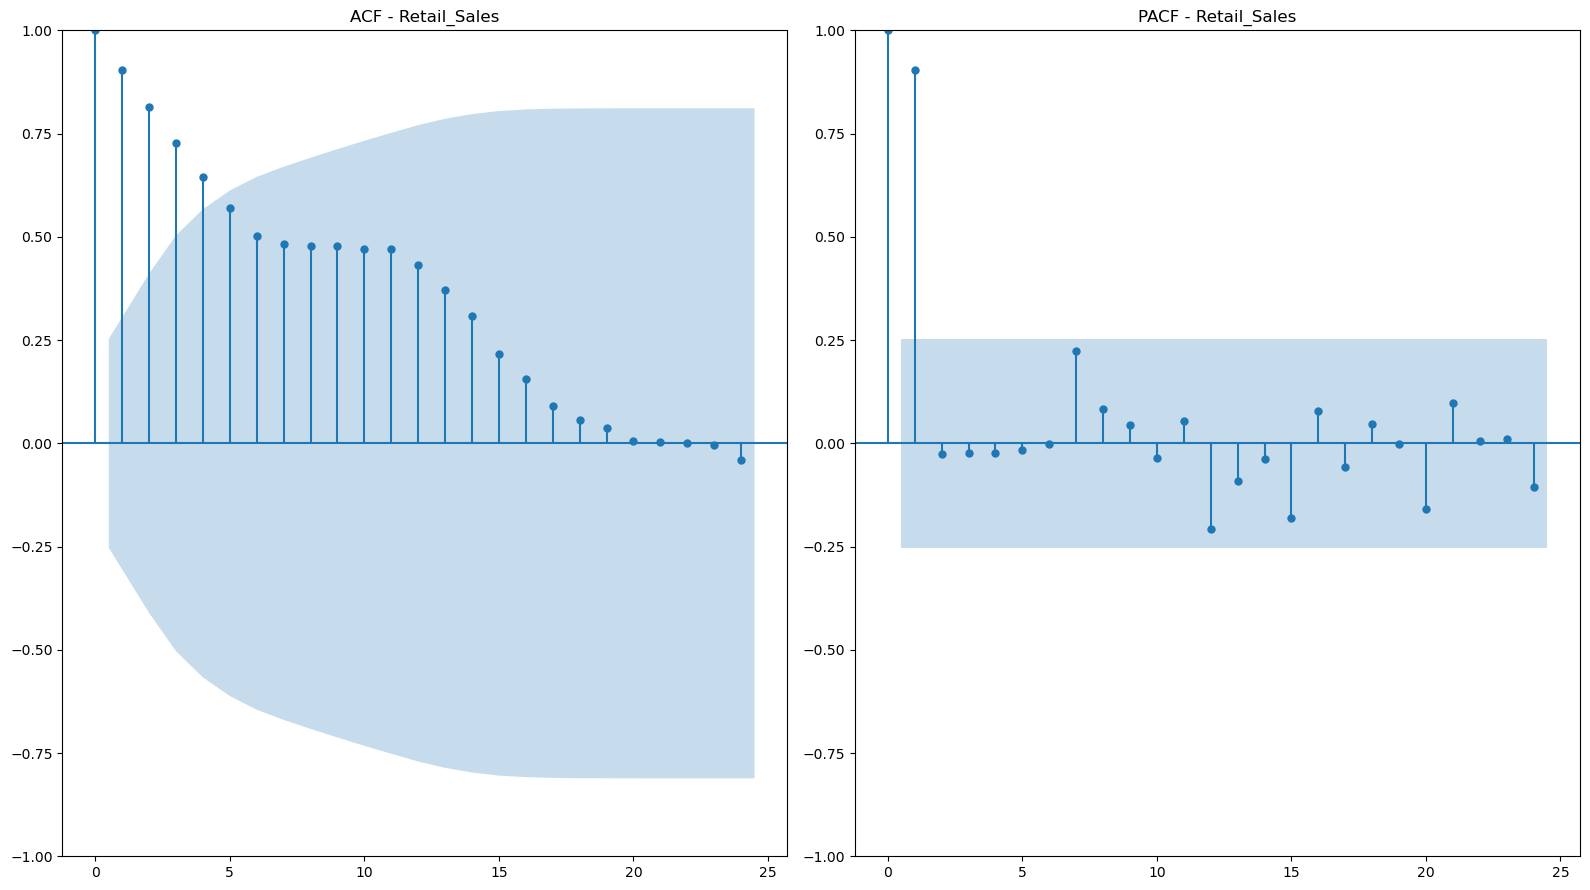

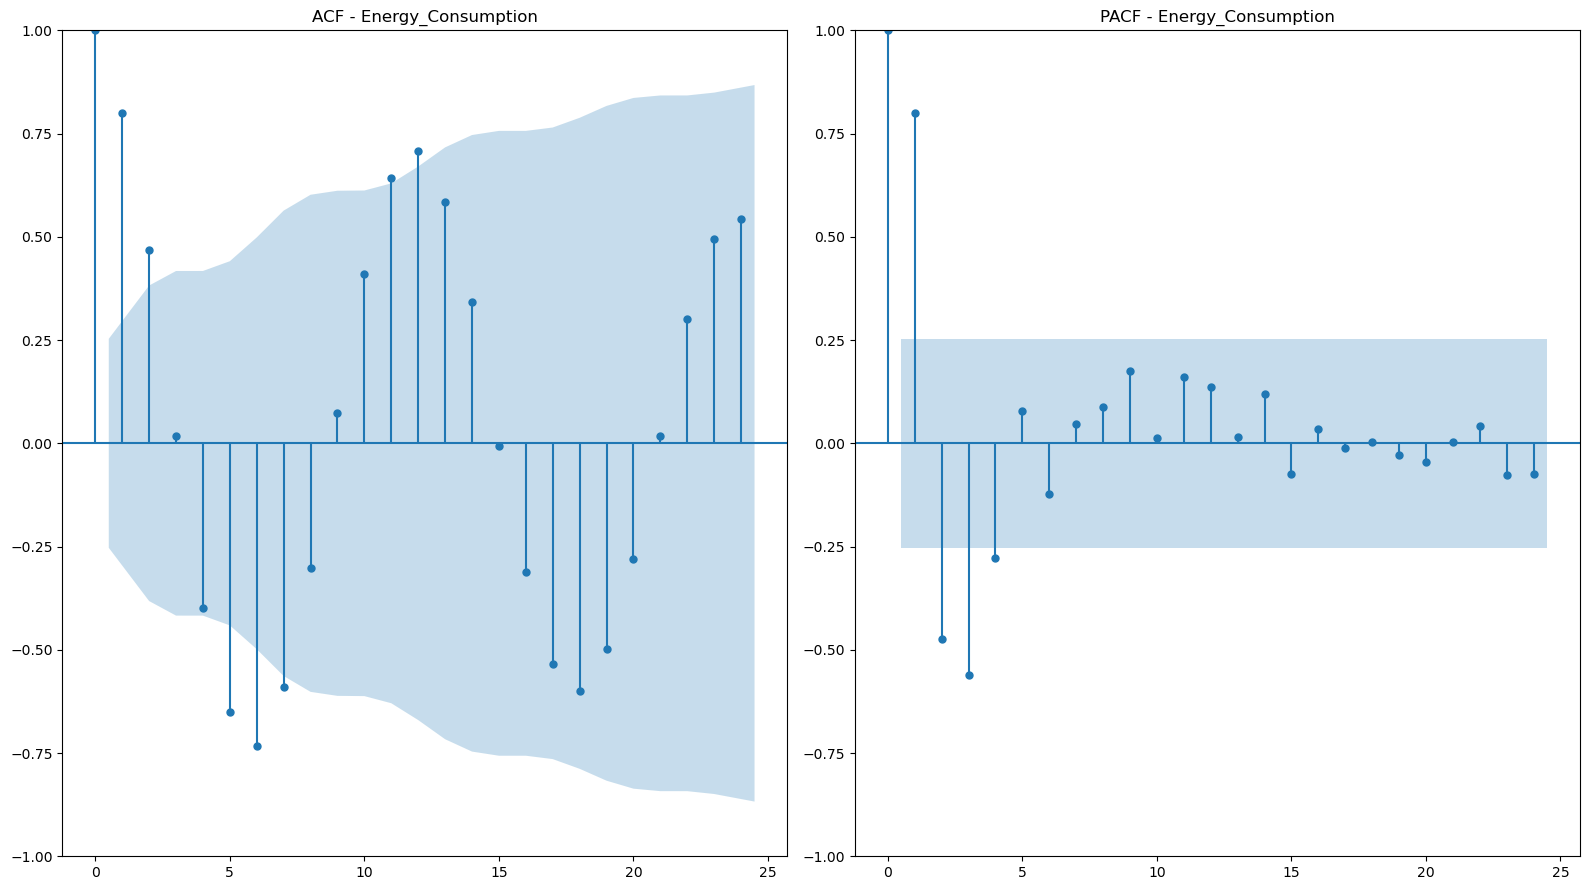

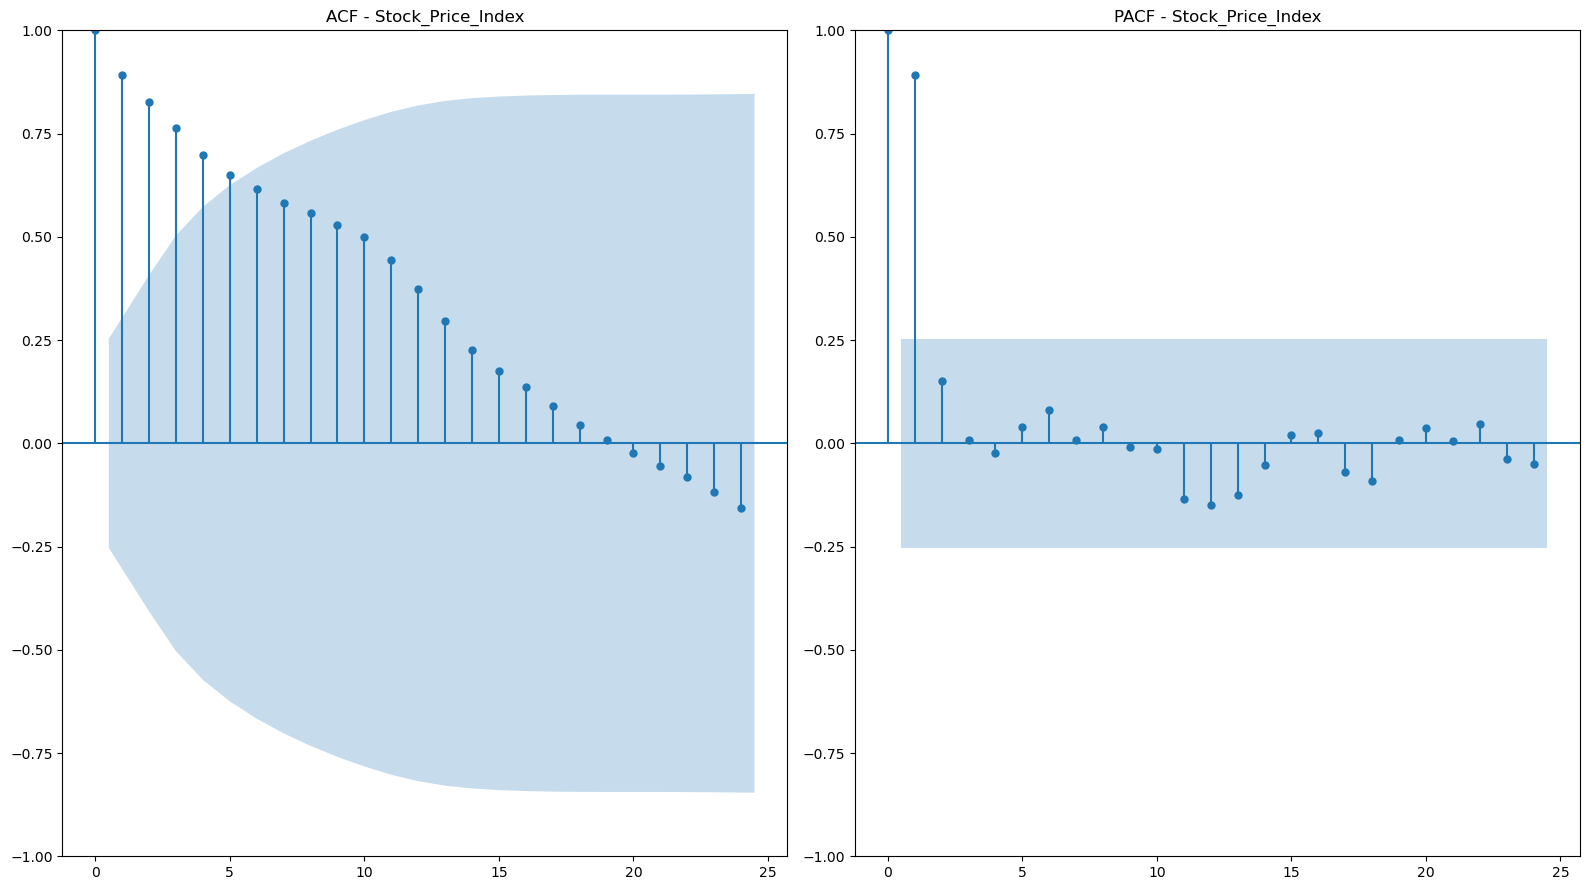

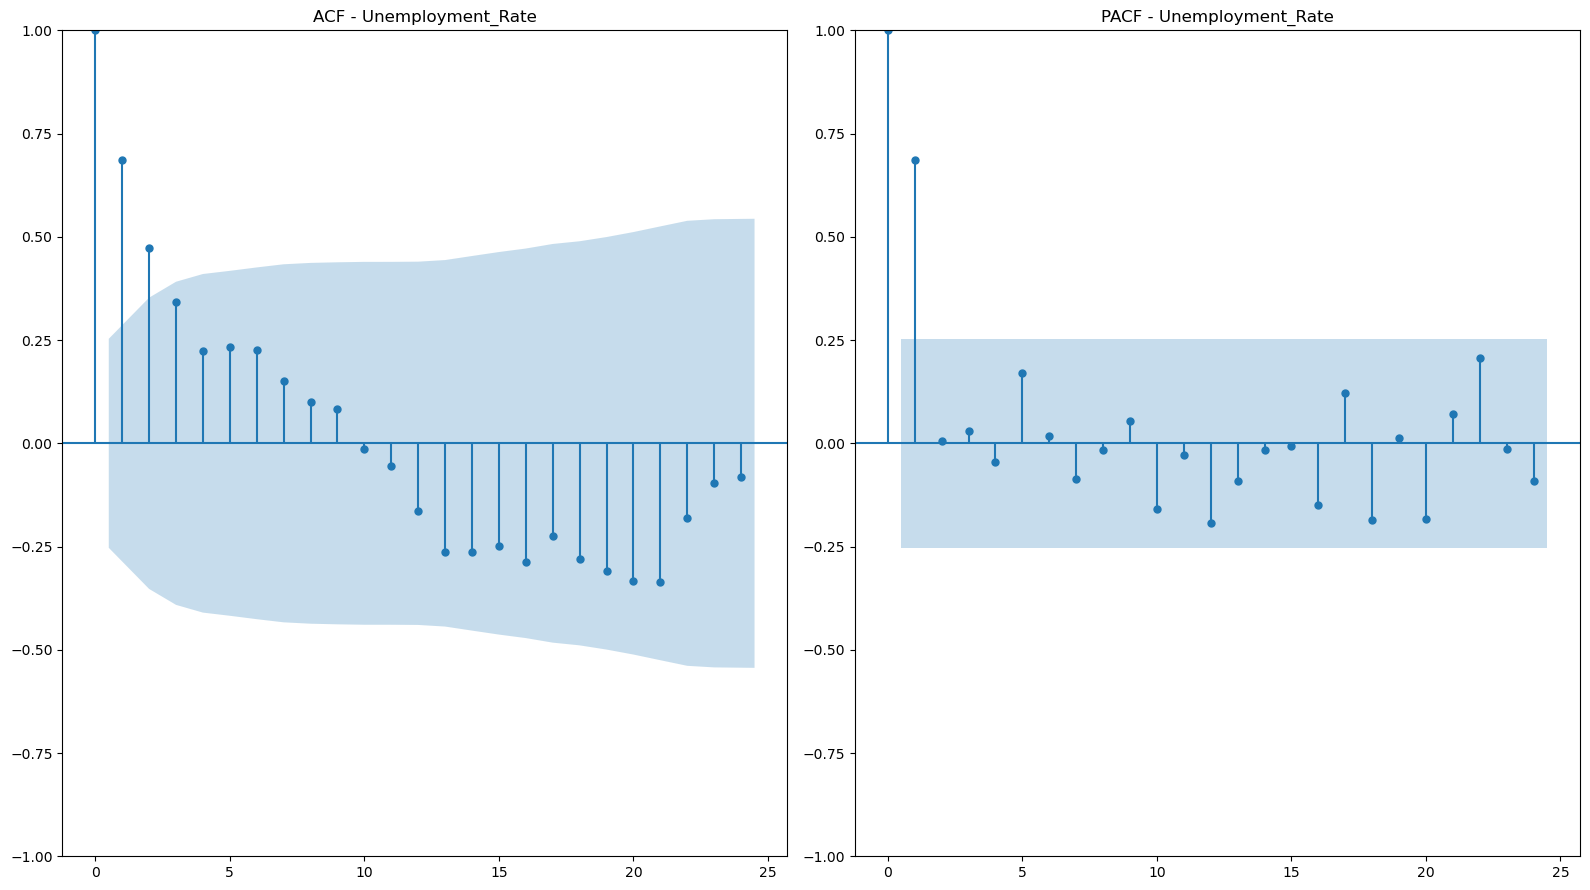

In [47]:
for col in df.columns:
    series = df[col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(16, 9))

    # ACF (up to 24 lags)
    plot_acf(series, ax=axes[0], lags=24)
    axes[0].set_title(f"ACF - {col}")

    # PACF (up to 24 lags)
    plot_pacf(series, ax=axes[1], lags=24, method="ywm")  
    axes[1].set_title(f"PACF - {col}")

    plt.tight_layout()
    plt.show()

In [48]:
def plot_decomposition_vertical(series, period=12, title=None):
    """
    Plots seasonal decomposition (observed, trend, seasonal, residual) for a given series vertically.
    Residuals include a 95% confidence interval (mean ± 1.96*std).
    
    Parameters:
    - series: pd.Series, time series data
    - period: int, seasonal period
    - title: str, optional title for the plots
    """
    decomposition = seasonal_decompose(series, period=period, model='additive')
    observed, trend, seasonal, resid = decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid

    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    
    # Observed
    axes[0].plot(observed, label='Observed', color='blue')
    axes[0].set_title(f"{title or series.name} - Observed")
    axes[0].legend()
    
    # Trend
    axes[1].plot(trend, label='Trend', color='orange')
    axes[1].set_title(f"{title or series.name} - Trend")
    axes[1].legend()
    
    # Seasonal
    axes[2].plot(seasonal, label='Seasonal', color='green')
    axes[2].set_title(f"{title or series.name} - Seasonal")
    axes[2].legend()
    
    # Residual + 95% CI
    axes[3].scatter(resid.index, resid.values, label='Residual', color='red')
    resid_mean = resid.mean()
    resid_std = resid.std()
    axes[3].fill_between(resid.index, resid_mean - 1.96*resid_std, resid_mean + 1.96*resid_std,
                         color='pink', alpha=0.3, label='95% CI')
    axes[3].set_title(f"{title or series.name} - Residuals with 95% CI")
    axes[3].legend()
    
    plt.tight_layout()
    plt.show()


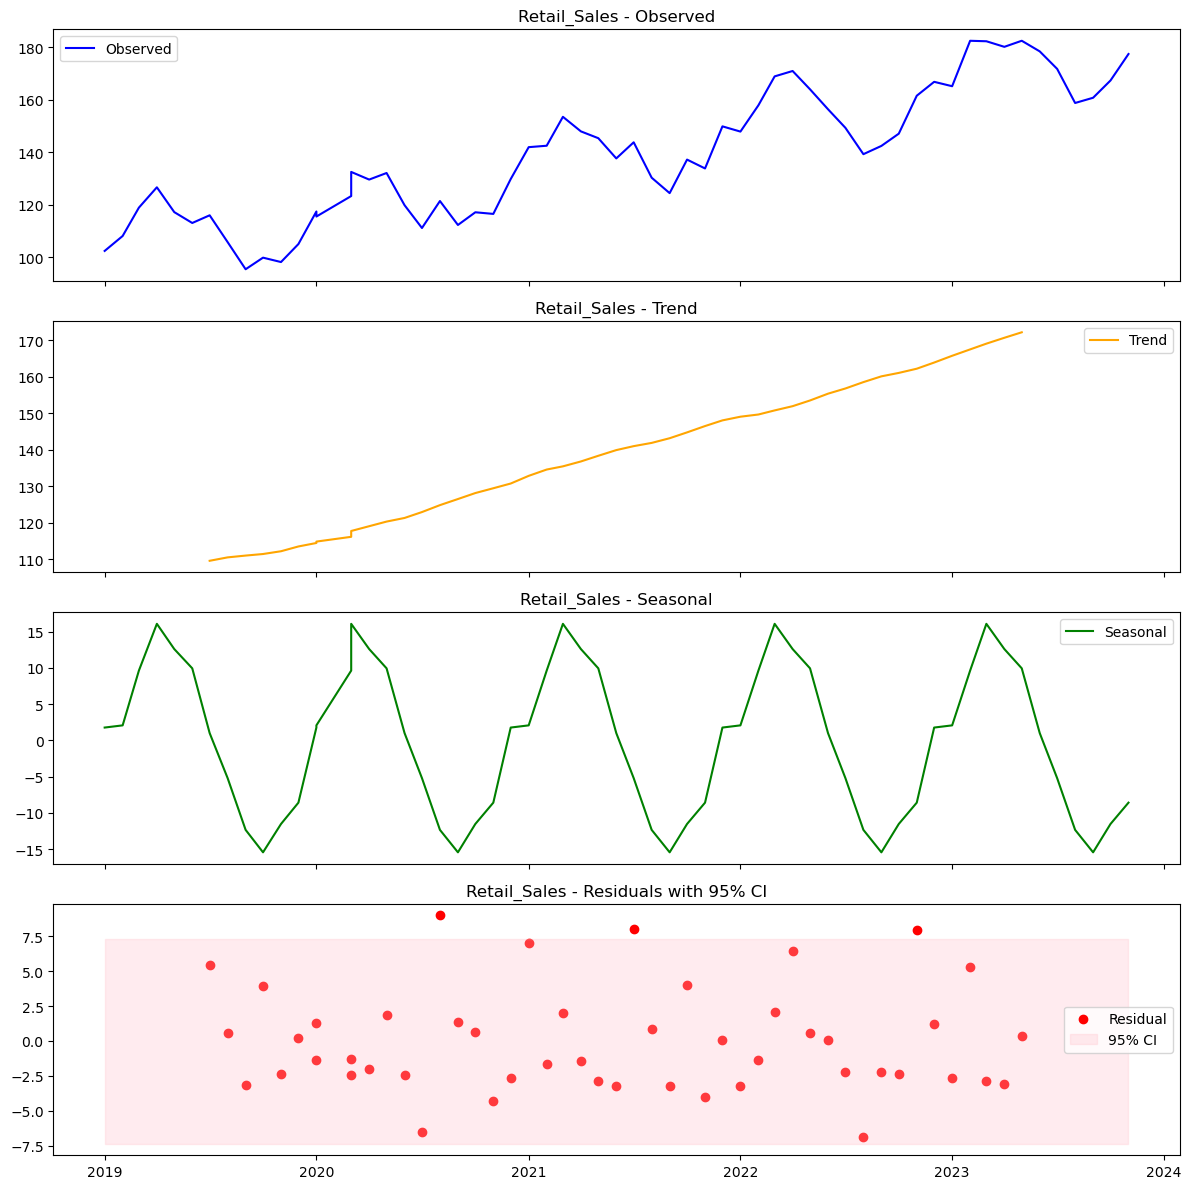

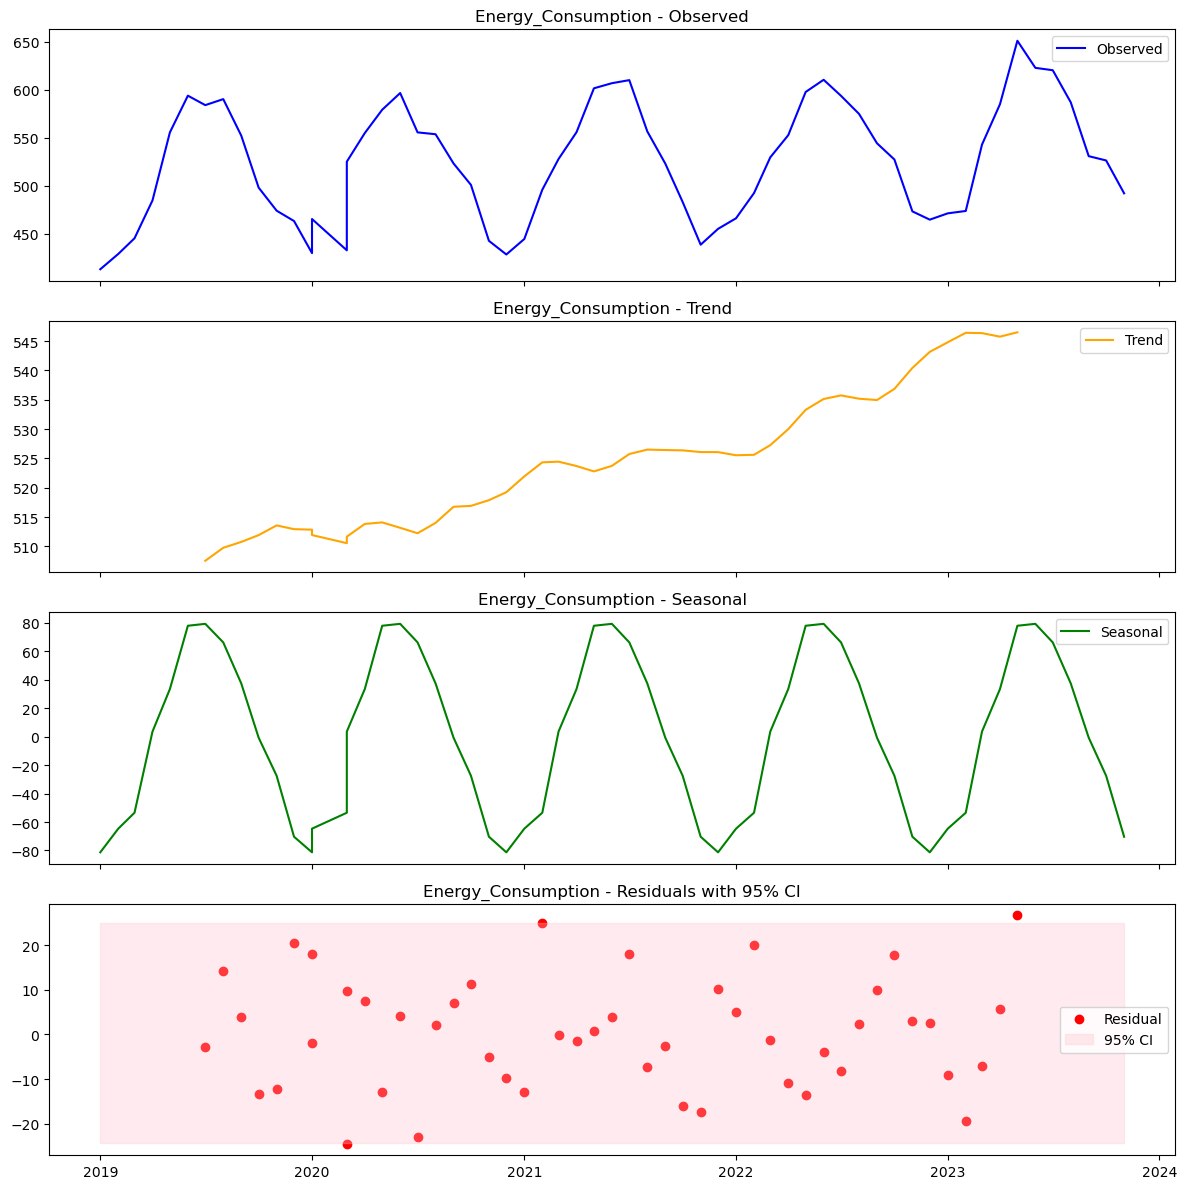

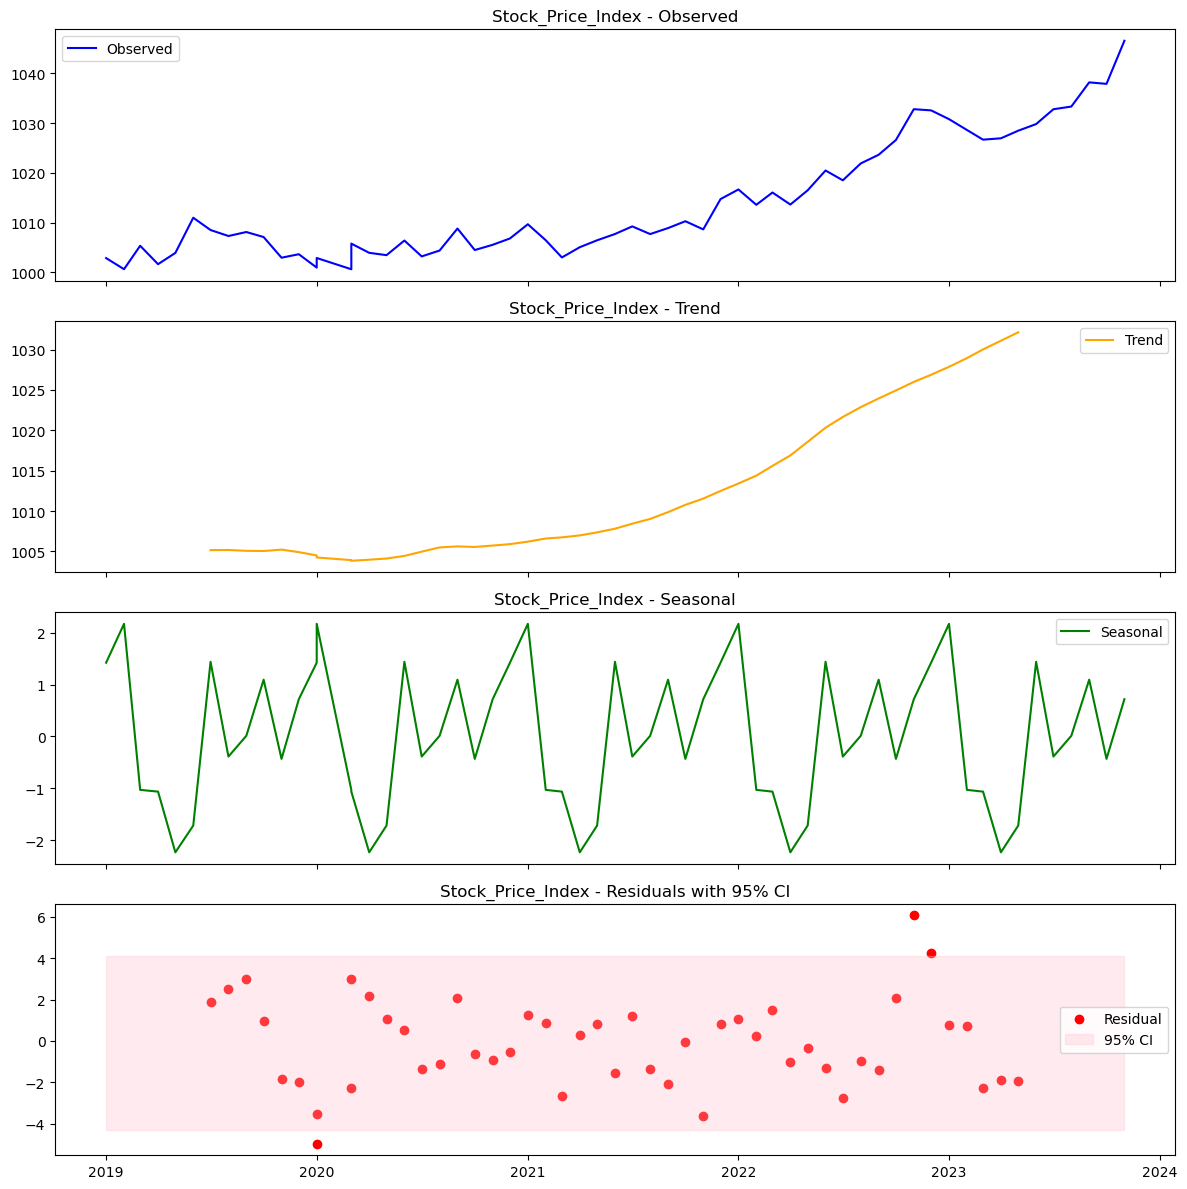

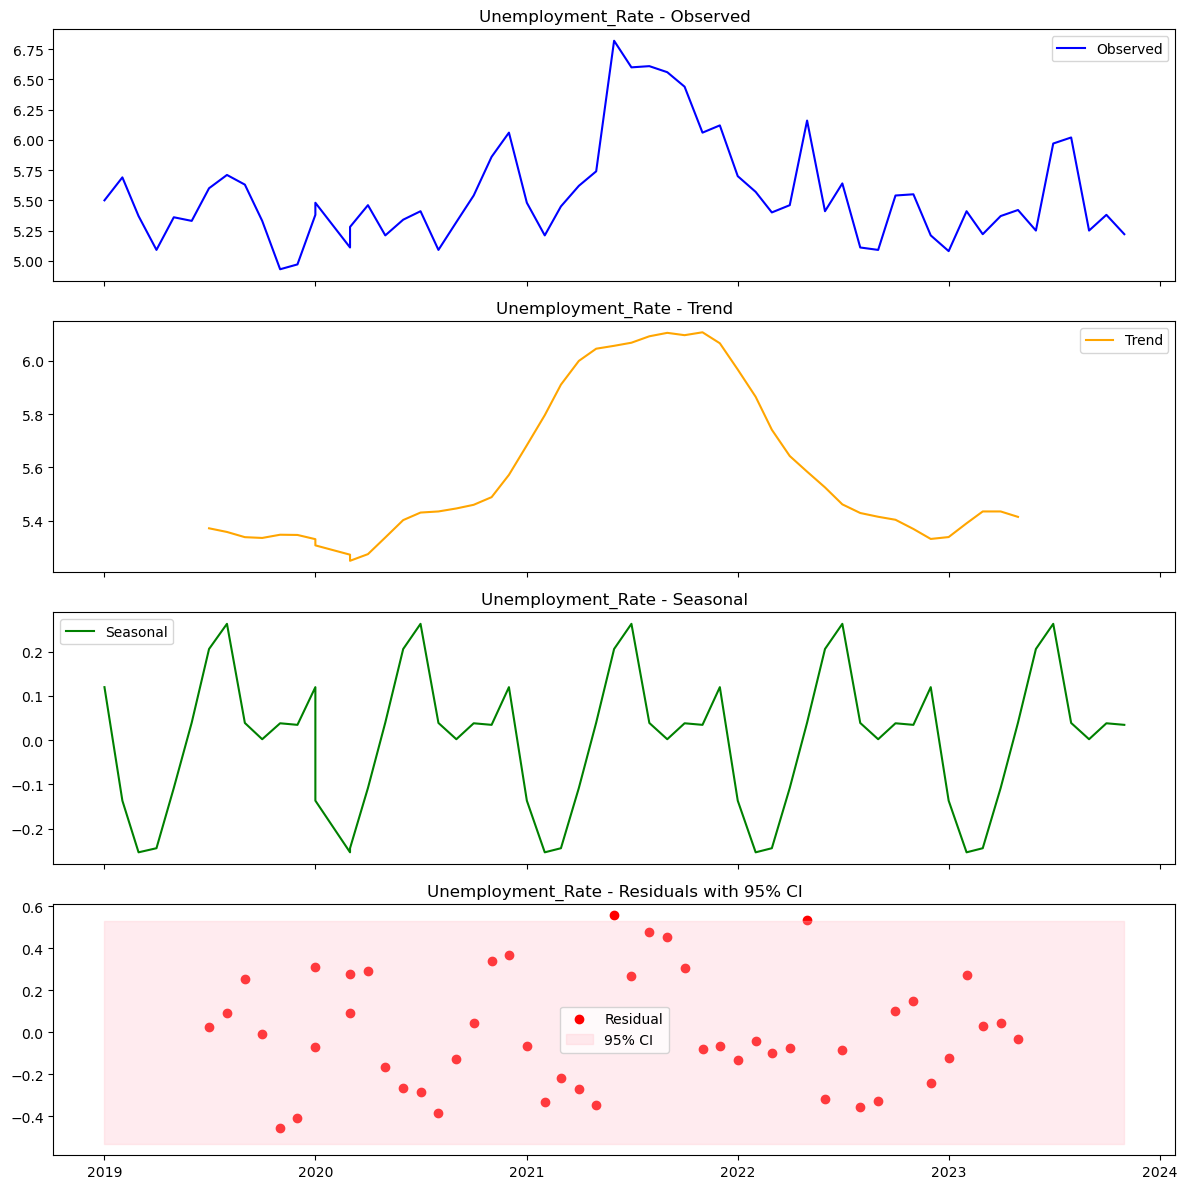

In [49]:
for col in df.columns:
    plot_decomposition_vertical(df[col], period=12, title=col)

## Testing of Unit Root:

In [50]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# -------- Helper Functions -------- #

def adf_test(series):
    stat, p, _, _, _, _ = adfuller(series, autolag='AIC')
    return stat, p

def kpss_test(series, regression='c'):
    stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
    return stat, p

def adf_conclusion(p):
    return "Stationary" if p < 0.05 else "Non-stationary"

def kpss_conclusion(p):
    return "Non-stationary" if p < 0.05 else "Stationary"

# Run ADF + KPSS tests and return tables
def run_stationarity_tests(df):
    adf_rows = []
    kpss_rows = []
    disagreements = []

    for col in df.columns:
        series = df[col]

        # --- ADF ---
        adf_stat, adf_p = adf_test(series)
        adf_result = adf_conclusion(adf_p)

        # --- KPSS ---
        kpss_stat, kpss_p = kpss_test(series)
        kpss_result = kpss_conclusion(kpss_p)

        # Store results
        adf_rows.append([col, adf_stat, adf_p, adf_result])
        kpss_rows.append([col, kpss_stat, kpss_p, kpss_result])

        # ------------------------------------
        # Detect disagreement between tests
        # ------------------------------------
        if adf_result != kpss_result:
            disagreements.append(
                f"{col}: ADF → {adf_result}, KPSS → {kpss_result} (CONFLICT)"
            )

    return (
        pd.DataFrame(adf_rows, columns=["Series", "ADF Statistic", "p-value", "Conclusion"]),
        pd.DataFrame(kpss_rows, columns=["Series", "KPSS Statistic", "p-value", "Conclusion"]),
        disagreements
    )



In [51]:

# ============================
# 1. BEFORE DIFFERENCING
# ============================

adf_before, kpss_before, disagree_before = run_stationarity_tests(df)

print("\n===== ADF Before Differencing =====\n")
print(adf_before)

print("\n===== KPSS Before Differencing =====\n")
print(kpss_before)

print("\n===== DISAGREEMENTS Before Differencing =====\n")
if disagree_before:
    for d in disagree_before:
        print(" -", d)
else:
    print("No disagreements between ADF and KPSS.")


# ========= AUTO-DETECT NON-STATIONARY SERIES ========= #

non_stationary_cols = []

for col in df.columns:
    adf_status = adf_before.loc[adf_before["Series"] == col, "Conclusion"].values[0]
    kpss_status = kpss_before.loc[kpss_before["Series"] == col, "Conclusion"].values[0]

    # If ANY test sees non-stationarity → treat as non-stationary
    if adf_status == "Non-stationary" or kpss_status == "Non-stationary":
        non_stationary_cols.append(col)

print("\nAUTO-DETECTED Non-stationary columns:")
print(non_stationary_cols)


===== ADF Before Differencing =====

               Series  ADF Statistic   p-value      Conclusion
0        Retail_Sales       1.119357  0.995378  Non-stationary
1  Energy_Consumption      -0.284920  0.927613  Non-stationary
2   Stock_Price_Index       1.307748  0.996652  Non-stationary
3   Unemployment_Rate      -3.179352  0.021211      Stationary

===== KPSS Before Differencing =====

               Series  KPSS Statistic  p-value      Conclusion
0        Retail_Sales        1.155900     0.01  Non-stationary
1  Energy_Consumption        0.193050     0.10      Stationary
2   Stock_Price_Index        1.134170     0.01  Non-stationary
3   Unemployment_Rate        0.182885     0.10      Stationary

===== DISAGREEMENTS Before Differencing =====

 - Energy_Consumption: ADF → Non-stationary, KPSS → Stationary (CONFLICT)

AUTO-DETECTED Non-stationary columns:
['Retail_Sales', 'Energy_Consumption', 'Stock_Price_Index']


C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: T

In [52]:

# ============================
# 2. FIRST DIFFERENCING
# ============================

df_diff = df[non_stationary_cols].diff().dropna()


# ============================
# 3. AFTER DIFFERENCING
# ============================

adf_after, kpss_after, disagree_after = run_stationarity_tests(df_diff)

print("\n===== ADF After Differencing =====\n")
print(adf_after)

print("\n===== KPSS After Differencing =====\n")
print(kpss_after)

print("\n===== DISAGREEMENTS After Differencing =====\n")
if disagree_after:
    for d in disagree_after:
        print(" -", d)
else:
    print("No disagreements between ADF and KPSS after differencing.")


===== ADF After Differencing =====

               Series  ADF Statistic       p-value  Conclusion
0        Retail_Sales      -7.359178  9.600840e-11  Stationary
1  Energy_Consumption      -6.521267  1.040749e-08  Stationary
2   Stock_Price_Index      -9.032637  5.393197e-15  Stationary

===== KPSS After Differencing =====

               Series  KPSS Statistic   p-value  Conclusion
0        Retail_Sales        0.026430  0.100000  Stationary
1  Energy_Consumption        0.059407  0.100000  Stationary
2   Stock_Price_Index        0.386687  0.082894  Stationary

===== DISAGREEMENTS After Differencing =====

No disagreements between ADF and KPSS after differencing.


C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_25128\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")


## ARIMA on Retail Sales

In [53]:


# Load data (adjust path if needed)
df = pd.read_csv('df_timestamp_change.csv', index_col='Date', parse_dates=True)
retail = df['Retail_Sales']

# Fit ARIMA(4,1,4)
model = ARIMA(retail, order=(6,1,6)).fit()
print(model.summary())

e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:           Retail_Sales   No. Observations:                   60
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -186.440
Date:                Mon, 15 Dec 2025   AIC                            398.880
Time:                        20:15:27   BIC                            425.888
Sample:                             0   HQIC                           409.422
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0364      0.275      0.133      0.894      -0.502       0.574
ar.L2         -0.0766      0.165     -0.464      0.643      -0.400       0.247
ar.L3          0.1790      0.127      1.406      0.1

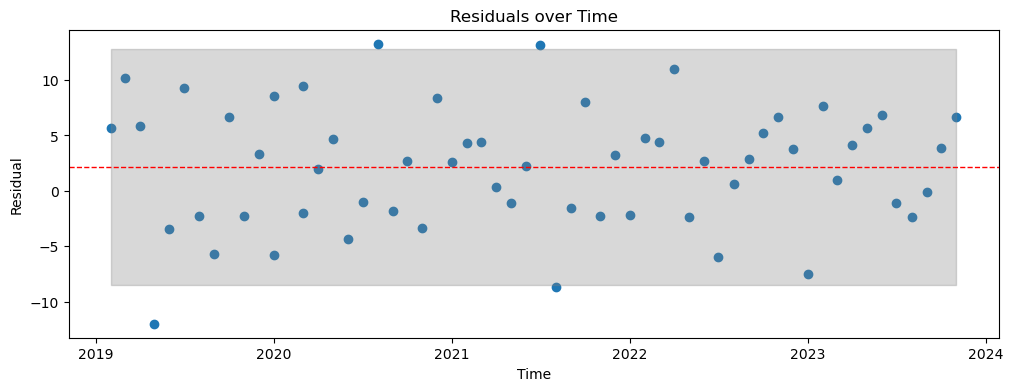

In [54]:
# Residuals
residuals = model.resid[1:]
# Plot residuals over time with mean line and 95 % confidence interval
plt.figure(figsize=(12, 4))
plt.scatter(residuals.index, residuals, label='Residuals')
# Mean of residuals
mean_res = residuals.mean()
plt.axhline(mean_res, color='red', linestyle='--', linewidth=1, label='Mean')
# 95 % confidence interval (mean ± 1.96·std)
std_res = residuals.std()
plt.fill_between(
    residuals.index,
    mean_res - 1.96 * std_res,
    mean_res + 1.96 * std_res,
    color='gray',
    alpha=0.3,
    label='95 % Confidence Interval'
)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residual')
#plt.legend()
plt.show()

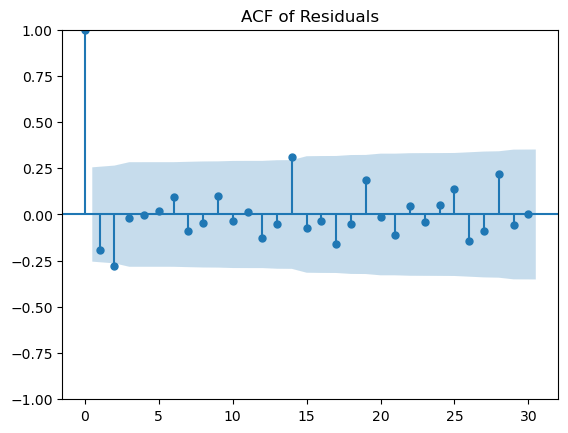

In [55]:
# ACF of residuals
plot_acf(residuals.dropna(), lags=30)
plt.title('ACF of Residuals')
plt.show()

In [56]:
# Ljung-Box test
lb_test = acorr_ljungbox(residuals.dropna(), lags=[24], return_df=True)
print('Ljung-Box test statistic:', lb_test['lb_stat'].values[0])
print('p-value:', lb_test['lb_pvalue'].values[0])

Ljung-Box test statistic: 26.523349977995405
p-value: 0.3271557628672407


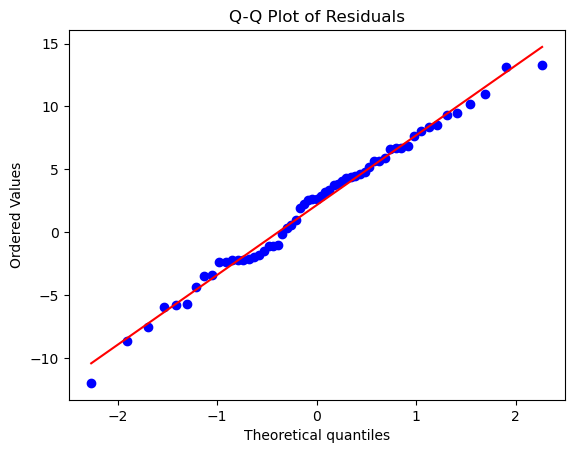

Shapiro-Wilk test statistic: 0.9883002135073665
p-value: 0.8422120655495651


In [57]:
# Q-Q plot
probplot(residuals.dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals.dropna())
print('Shapiro-Wilk test statistic:', shapiro_stat)
print('p-value:', shapiro_p)

e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


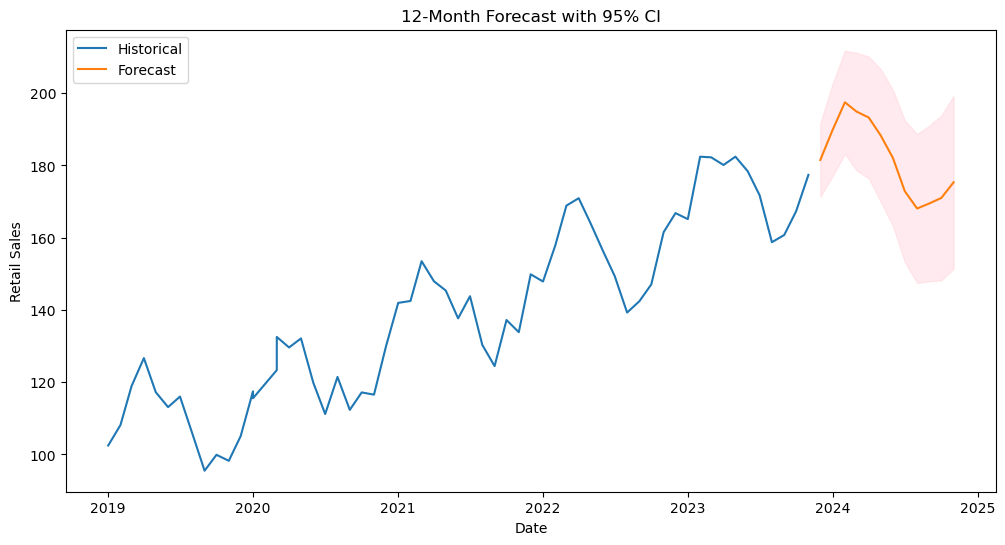

In [58]:
# 12‑month ahead forecast
forecast = model.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Create forecast index
forecast_index = pd.date_range(start=retail.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(retail, label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title('12‑Month Forecast with 95% CI')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.show()

## ARIMA on Stock Price Index

In [59]:


# Load data (adjust path if needed)
df = pd.read_csv('df_timestamp_change.csv', index_col='Date', parse_dates=True)
stock_price_index = df['Stock_Price_Index']

# Fit ARIMA(4,1,4)
model_stock = ARIMA(stock_price_index, order=(6,1,6)).fit()
print(model_stock.summary())

e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:      Stock_Price_Index   No. Observations:                   60
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -142.010
Date:                Mon, 15 Dec 2025   AIC                            310.020
Time:                        20:15:28   BIC                            337.028
Sample:                             0   HQIC                           320.562
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1419      2.087      0.068      0.946      -3.949       4.233
ar.L2         -0.1182      0.258     -0.458      0.647      -0.624       0.388
ar.L3          0.2929      0.464      0.631      0.5

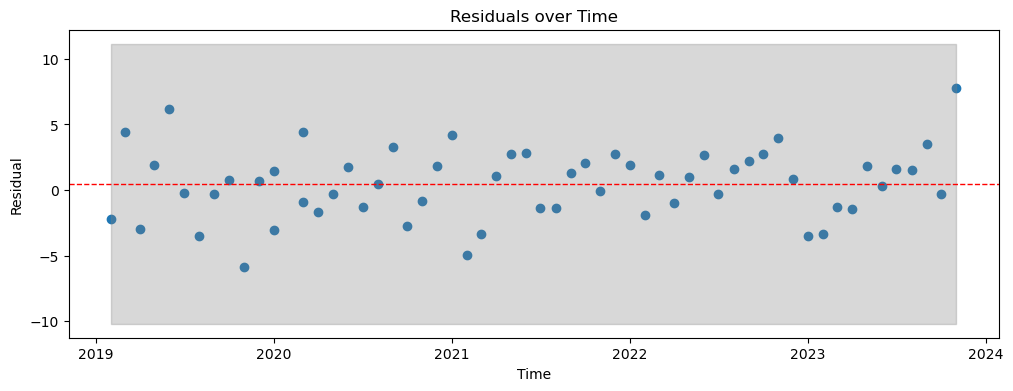

In [60]:
# Residuals
residuals_stock = model_stock.resid[1:]
# Plot residuals over time with mean line and 95 % confidence interval
plt.figure(figsize=(12, 4))
plt.scatter(residuals_stock.index, residuals_stock, label='Residuals')
# Mean of residuals
mean_res = residuals_stock.mean()
plt.axhline(mean_res, color='red', linestyle='--', linewidth=1, label='Mean')
# 95 % confidence interval (mean ± 1.96·std)
std_res = residuals.std()
plt.fill_between(
    residuals.index,
    mean_res - 1.96 * std_res,
    mean_res + 1.96 * std_res,
    color='gray',
    alpha=0.3,
    label='95 % Confidence Interval'
)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residual')
#plt.legend()
plt.show()

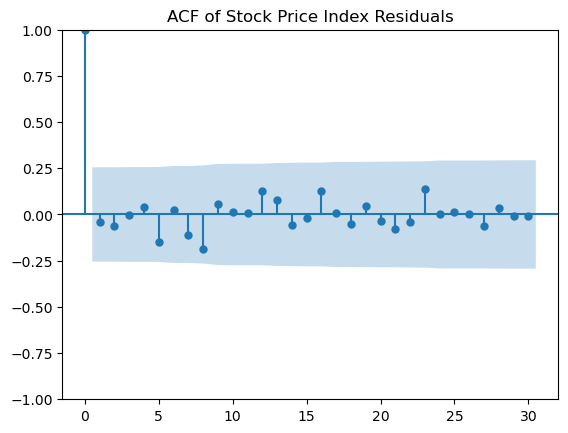

In [61]:
# ACF of residuals
plot_acf(residuals_stock.dropna(), lags=30)
plt.title('ACF of Stock Price Index Residuals')
plt.show()

In [62]:
# Ljung-Box test
lb_test = acorr_ljungbox(residuals_stock.dropna(), lags=[24], return_df=True)
print('Ljung-Box test statistic:', lb_test['lb_stat'].values[0])
print('p-value:', lb_test['lb_pvalue'].values[0])

Ljung-Box test statistic: 12.067204802113983
p-value: 0.9791403548717191


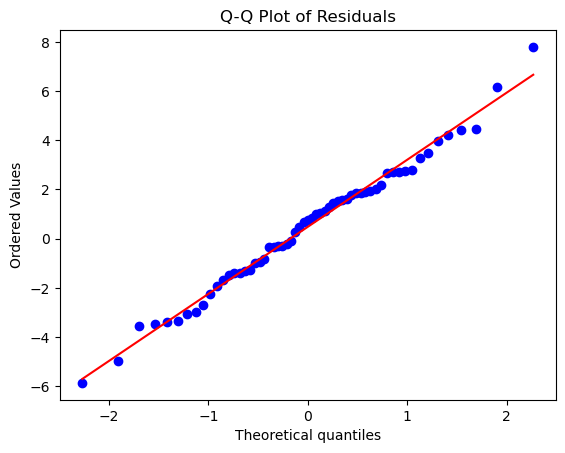

Shapiro-Wilk test statistic: 0.9909239505173785
p-value: 0.9394771275898075


In [63]:
# Q-Q plot
probplot(residuals_stock.dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals_stock.dropna())
print('Shapiro-Wilk test statistic:', shapiro_stat)
print('p-value:', shapiro_p)

e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\programFiles\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


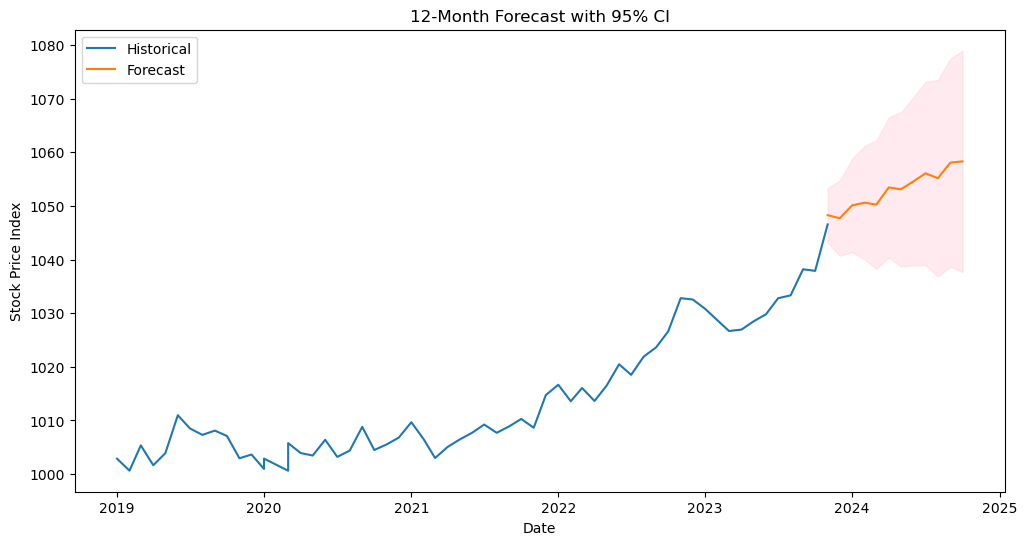

In [64]:
# 12‑month ahead forecast
forecast_stock = model_stock.get_forecast(steps=12)
forecast_ci = forecast_stock.conf_int()

# Create forecast index
forecast_index = pd.date_range(start=stock_price_index.index[-1], periods=12, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(stock_price_index, label='Historical')
plt.plot(forecast_index, forecast_stock.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title('12‑Month Forecast with 95% CI')
plt.xlabel('Date')
plt.ylabel('Stock Price Index')
plt.legend()
plt.show()

# Non-Seasonal ARIMA Modeling for Energy Consumption
Analysis to find the best (p,d,q) parameters.

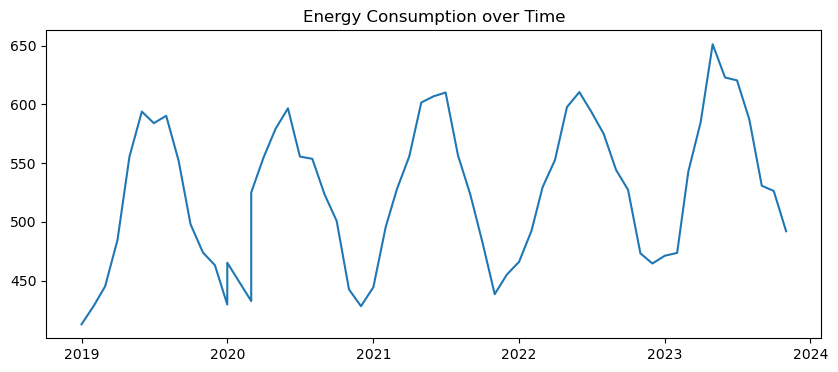

In [132]:
energy_data = df['Energy_Consumption']
plt.figure(figsize=(10, 4))
plt.plot(energy_data)
plt.title('Energy Consumption over Time')
plt.show()

In [133]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("\nResult: Stationary (p-value <= 0.05)")
        return True
    else:
        print("\nResult: Non-Stationary (p-value > 0.05)")
        return False

print("Original Series:")
is_stationary = check_stationarity(energy_data)

d = 0
energy_data_diff = energy_data.copy()
while not is_stationary and d < 2:
    d += 1
    energy_data_diff = energy_data_diff.diff().dropna()
    print(f"\nDifferencing order d={d}:")
    is_stationary = check_stationarity(energy_data_diff)

print(f"\nOptimal differencing order (d) to use: {d}")

Original Series:
Results of Dickey-Fuller Test:
Test Statistic                 -0.284920
p-value                         0.927613
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64

Result: Non-Stationary (p-value > 0.05)

Differencing order d=1:
Results of Dickey-Fuller Test:
Test Statistic                -6.521267e+00
p-value                        1.040749e-08
#Lags Used                     9.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64

Result: Stationary (p-value <= 0.05)

Optimal differencing order (d) to use: 1


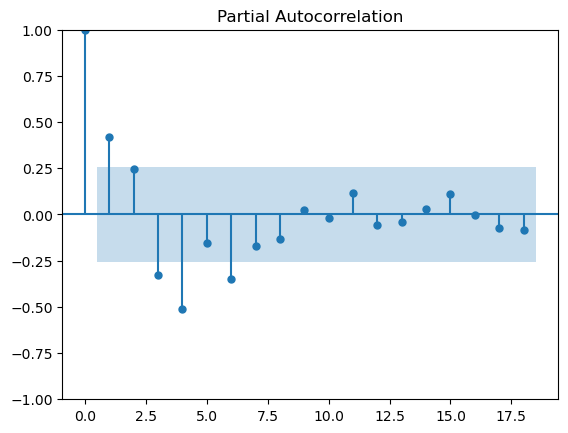

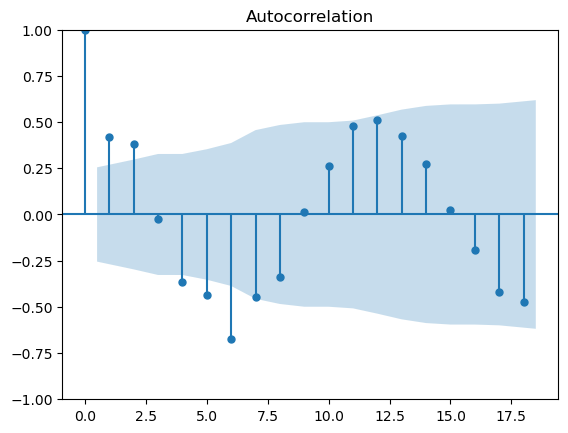

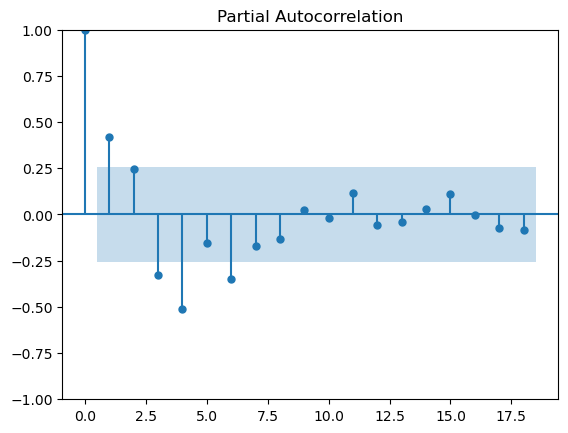

In [134]:
plot_acf(energy_data_diff)
plot_pacf(energy_data_diff)



In [225]:
# 3. Grid Search for Best Non-Seasonal ARIMA(p,d,q)
warnings.filterwarnings("ignore")

best_aic = float("inf")
best_order = None
best_model_fit = None
best_bic = float("inf")

p_values = range(0, 6)
d_value = 1
q_values = range(0, 7)

print("Starting Grid Search for ARIMA(p,d,q) with d=%d..." % d_value)
for p in p_values:
    for q in q_values:
        try:
            # force seasonal_order to (0,0,0,0) just in case, though ARIMA default is non-seasonal
            model = ARIMA(energy_data, order=(p, d_value, q))
            results = model.fit()
            
            if results.aic/len(energy_data) < best_aic:
                best_aic = results.aic/len(energy_data)
                best_order_arima = (p, d_value, q)
                best_arima_model = results
                best_bic = results.bic/len(energy_data)
                
            print(f"ARIMA({p},{d_value},{q}) - AIC: {results.aic/len(energy_data):.2f} & BIC: {results.bic/len(energy_data):.2f}")
        except:
            continue

print(f"\nBest Model: ARIMA{best_order_arima} with AIC: {best_aic:.2f} and BIC: {best_bic:.2f}")
print(best_arima_model.summary())

Starting Grid Search for ARIMA(p,d,q) with d=1...
ARIMA(0,1,0) - AIC: 9.87 & BIC: 9.90
ARIMA(0,1,1) - AIC: 9.79 & BIC: 9.85
ARIMA(0,1,2) - AIC: 9.56 & BIC: 9.66
ARIMA(0,1,3) - AIC: 9.81 & BIC: 9.95
ARIMA(0,1,4) - AIC: 9.59 & BIC: 9.77
ARIMA(0,1,5) - AIC: 9.56 & BIC: 9.77
ARIMA(0,1,6) - AIC: 9.42 & BIC: 9.67
ARIMA(1,1,0) - AIC: 9.71 & BIC: 9.78
ARIMA(1,1,1) - AIC: 9.72 & BIC: 9.82
ARIMA(1,1,2) - AIC: 9.57 & BIC: 9.70
ARIMA(1,1,3) - AIC: 9.52 & BIC: 9.69
ARIMA(1,1,4) - AIC: 9.50 & BIC: 9.71
ARIMA(1,1,5) - AIC: 9.51 & BIC: 9.75
ARIMA(1,1,6) - AIC: 9.44 & BIC: 9.71
ARIMA(2,1,0) - AIC: 9.68 & BIC: 9.78
ARIMA(2,1,1) - AIC: 9.69 & BIC: 9.83
ARIMA(2,1,2) - AIC: 9.59 & BIC: 9.77
ARIMA(2,1,3) - AIC: 8.65 & BIC: 8.86
ARIMA(2,1,4) - AIC: 8.68 & BIC: 8.93
ARIMA(2,1,5) - AIC: 8.71 & BIC: 8.99
ARIMA(2,1,6) - AIC: 8.74 & BIC: 9.05
ARIMA(3,1,0) - AIC: 9.61 & BIC: 9.75
ARIMA(3,1,1) - AIC: 9.15 & BIC: 9.32
ARIMA(3,1,2) - AIC: 8.75 & BIC: 8.96
ARIMA(3,1,3) - AIC: 8.69 & BIC: 8.93
ARIMA(3,1,4) - AIC: 8.73 

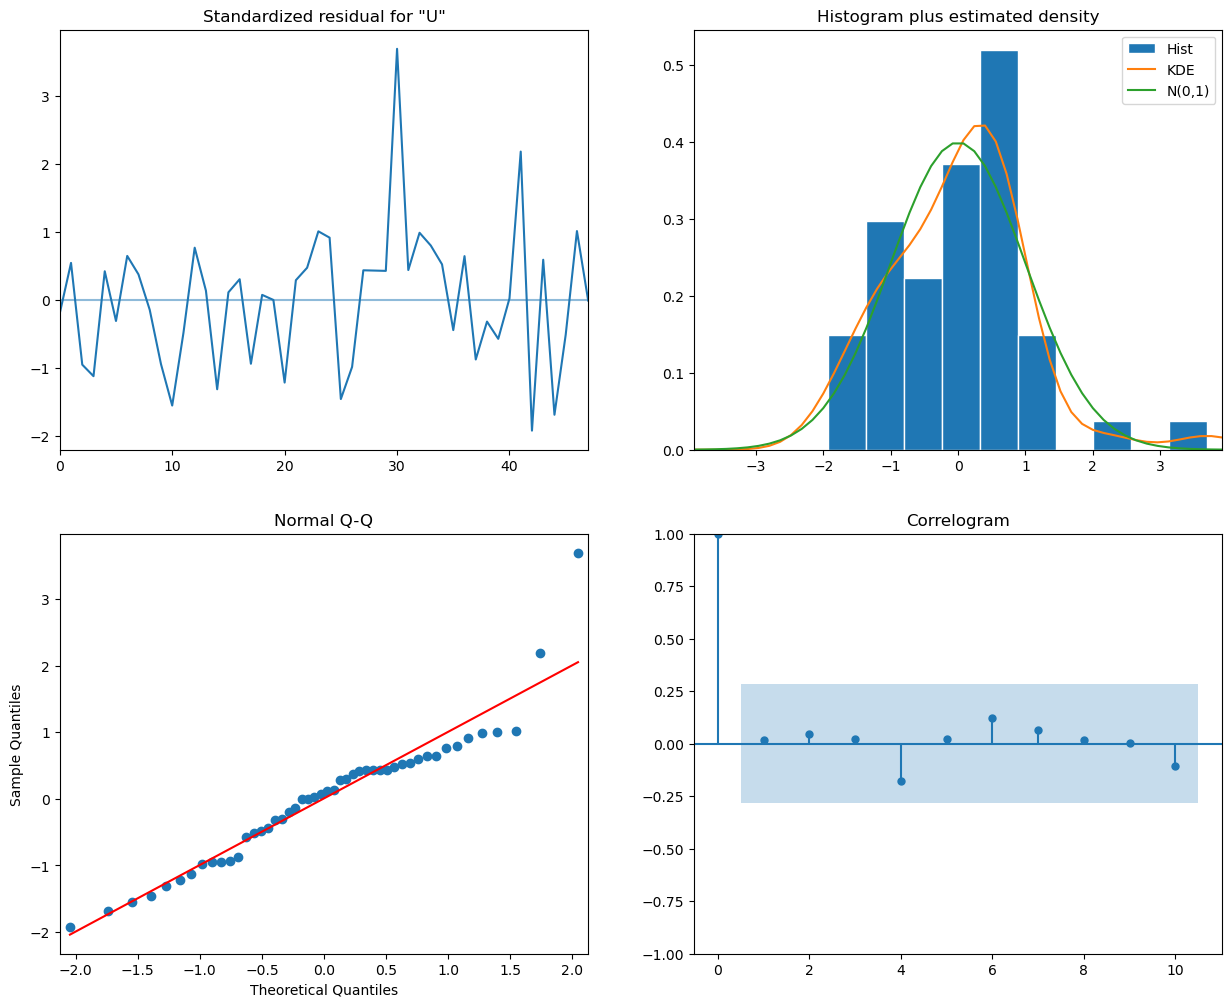

In [210]:
# 4. Diagnostic Plots for Best Model
if best_model_arima:
    best_model_arima.plot_diagnostics(figsize=(15, 12))
    plt.show()

# Part 4: SARIMA vs ARIMA Comparison
Train/Test split, Seasonal ARIMA modeling, and performance evaluation.

In [228]:
# Forecast on Test
arima_forecast = best_arima_model.forecast(steps=len(energy_data))
arima_rmse = np.sqrt(mean_squared_error(energy_data.values, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")


ARIMA RMSE: 33.96


In [235]:
print("Starting SARIMA Grid Search & Comparison...")

# Initialize a list to store results for all models
model_comparison_list = []

# Seasonal parameters range
P_values = range(0, 2)
D_values = 1 
Q_values = range(0, 2)
s = 12

# 1. Loop through SARIMA combinations
for P in P_values:
    for Q in Q_values:
        try:
            # Use best_order_arima for the non-seasonal part (p,d,q)
            # We use 'train' (or energy_data) to fit the model
            seasonal_order = (P, D_values, Q, s)
            
            model = SARIMAX(energy_data, 
                            order=(0,0,0), 
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False, 
                            enforce_invertibility=False)
            
            results = model.fit(disp=False)
            
            if np.isnan(results.aic):
                continue
            
            forecast = results.forecast(steps=len(energy_data))
            rmse = np.sqrt(mean_squared_error(energy_data.values, forecast))
            
            # Append results to the list
            model_comparison_list.append({
                'Model': f'SARIMA {0,0,0}x{seasonal_order}',
                'AIC': results.aic/len(energy_data),
                'BIC': results.bic/len(energy_data),
                'RMSE': rmse
            })
            
            print(f"Processed SARIMA{0,0,0}x{seasonal_order} - AIC: {results.aic/len(energy_data):.2f}")

        except Exception as e:
            print(f"Error for SARIMA{0,0,0}x({P},{D_values},{Q},{s}): {e}")
            continue

model_comparison_list.append({
    'Model': f'Best ARIMA {best_order_arima}',
    'AIC': best_aic,
    'BIC': best_bic,
    'RMSE': arima_rmse
})

comparison_df = pd.DataFrame(model_comparison_list)

# Sort by RMSE (or AIC) to see the best model at the top
comparison_df = comparison_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

print("\n--- Model Comparison Table ---")
display(comparison_df)

Starting SARIMA Grid Search & Comparison...
Processed SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 7.22
Processed SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 17.90
Processed SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 5.50
Processed SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 20.69

--- Model Comparison Table ---


,Model,AIC,BIC,RMSE
0,"SARIMA (0, 0, 0)x(1, 1, 0, 12)",5.500036,5.552820,27.831482
1,"SARIMA (0, 0, 0)x(0, 1, 0, 12)",7.215458,7.246294,31.051674
2,"SARIMA (0, 0, 0)x(0, 1, 1, 12)",17.900460,17.952305,31.051674
3,"SARIMA (0, 0, 0)x(1, 1, 1, 12)",20.685297,20.763065,32.258590
4,"Best ARIMA (2, 1, 3)",8.652062,8.859816,33.964889


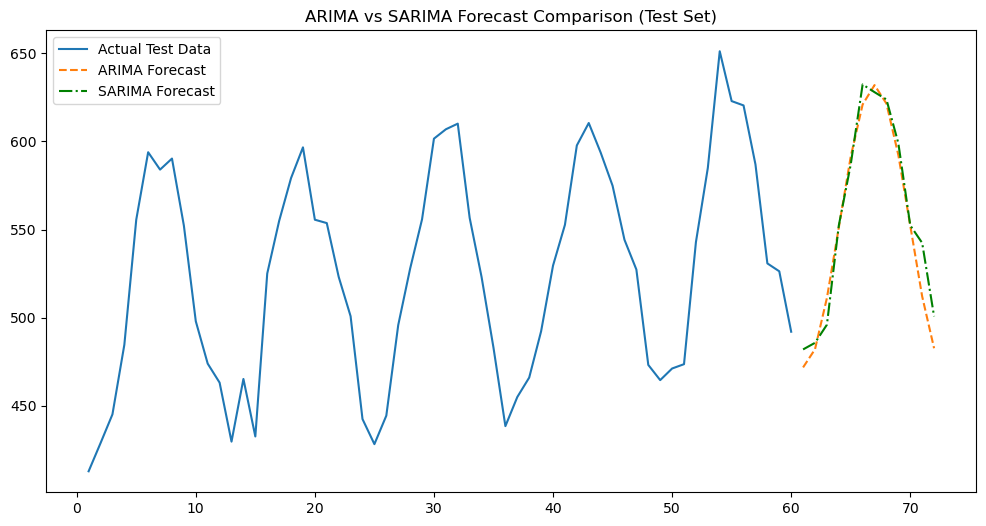

In [239]:
arima_forecast = best_arima_model.forecast(steps=12)
best_sarima_model = SARIMAX(energy_data, order=best_order_arima, seasonal_order=best_seasonal_order).fit()
sarima_forecast = best_sarima_model.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(range(1,61), energy_data, label='Actual Test Data')
plt.plot(range(61,73), arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(range(61,73), sarima_forecast, label='SARIMA Forecast', linestyle='-.', color='green')
plt.legend()
plt.title('ARIMA vs SARIMA Forecast Comparison (Test Set)')
plt.show()

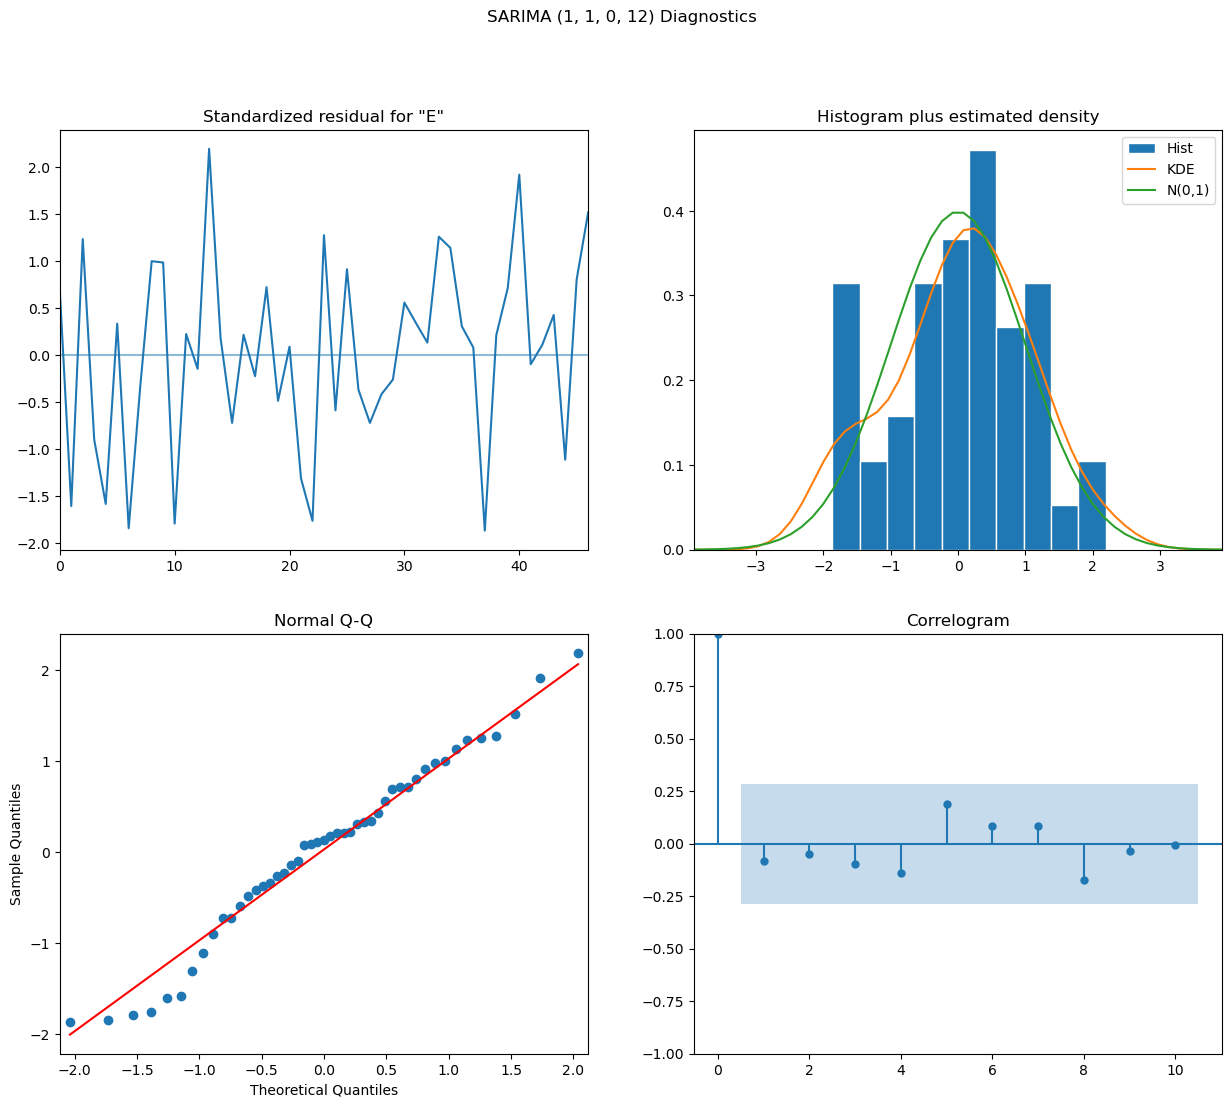

In [240]:
# 9. Diagnostics for Best SARIMA
best_sarima_model.plot_diagnostics(figsize=(15, 12))
plt.suptitle(f'SARIMA {best_seasonal_order} Diagnostics')
plt.show()

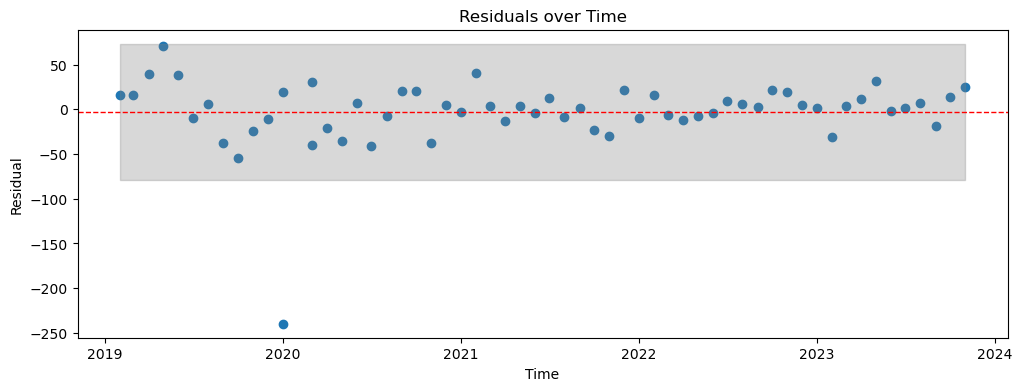

In [245]:
# Residuals
residuals_energy = best_sarima_model.resid[1:]
# Plot residuals over time with mean line and 95 % confidence interval
plt.figure(figsize=(12, 4))
plt.scatter(residuals_energy.index, residuals_energy, label='Residuals')
# Mean of residuals
mean_res = residuals_energy.mean()
plt.axhline(mean_res, color='red', linestyle='--', linewidth=1, label='Mean')
# 95 % confidence interval (mean ± 1.96·std)
std_res = residuals_energy.std()
plt.fill_between(
    residuals_energy.index,
    mean_res - 1.96 * std_res,
    mean_res + 1.96 * std_res,
    color='gray',
    alpha=0.3,
    label='95% Confidence Interval'
)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residual')
#plt.legend()
plt.show()

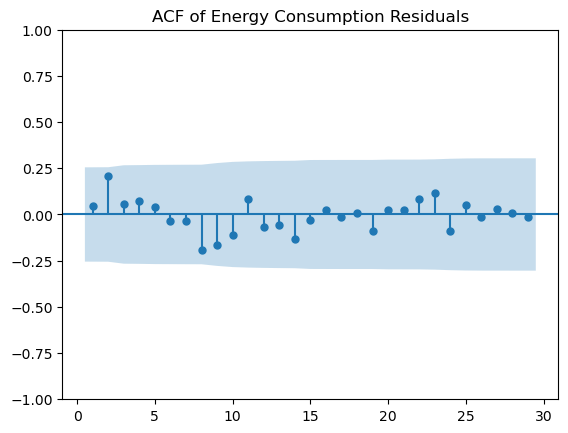

In [249]:
# ACF of residuals
plot_acf(residuals_energy.dropna(), lags=range(1,30))
plt.title('ACF of Energy Consumption Residuals')
plt.show()

In [252]:
# Ljung-Box test
lb_test = acorr_ljungbox(residuals_energy.dropna(), lags=[24], return_df=True)
print('Ljung-Box test statistic:', lb_test['lb_stat'].values[0])
print('p-value:', lb_test['lb_pvalue'].values[0])

Ljung-Box test statistic: 15.504211875891203
p-value: 0.9051351232159403


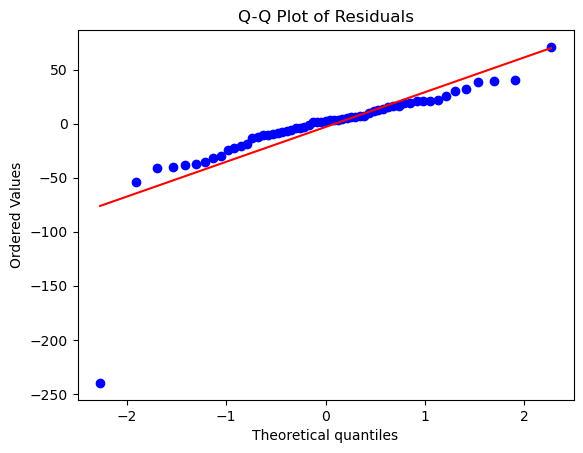

Shapiro-Wilk test statistic: 0.6787903779997306
p-value: 4.407974266266376e-10


In [257]:
# Q-Q plot
probplot(residuals_energy.dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals_energy.dropna())
print('Shapiro-Wilk test statistic:', shapiro_stat)
print('p-value:', shapiro_p)

# Part 5: Exponential Smoothing Models
Fitting Simple, Holt's, and Holt-Winters models and comparing performance.

In [ ]:
# 11. Fit Exponential Smoothing Models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred, model_name, aic):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'Model': model_name, 'AIC': aic, 'MSE': mse, 'MAE': mae, 'MAPE': mape}

es_results = []
es_models = {}


# 1. Simple Exponential Smoothing
model_ses = ExponentialSmoothing(energy_data, trend=None, seasonal=None).fit()
pred_ses = model_ses.fittedvalues
es_results.append(calculate_metrics(energy_data, pred_ses, 'Simple ES', model_ses.aic))
es_models['Simple ES'] = model_ses

# 2. Holt's Linear Trend
model_holt = ExponentialSmoothing(energy_data, trend='add', seasonal=None).fit()
pred_holt = model_holt.fittedvalues
es_results.append(calculate_metrics(energy_data, pred_holt, "Holt's Linear", model_holt.aic))
es_models["Holt's Linear"] = model_holt

# 3. Holt-Winters Additive
model_hw_add = ExponentialSmoothing(energy_data, trend='add', seasonal='add', seasonal_periods=12).fit()
pred_hw_add = model_hw_add.fittedvalues
es_results.append(calculate_metrics(energy_data, pred_hw_add, "HW Additive", model_hw_add.aic))
es_models["HW Additive"] = model_hw_add

# 4. Holt-Winters Multiplicative
model_hw_mul = ExponentialSmoothing(energy_data, trend='add', seasonal='mul', seasonal_periods=12).fit()
pred_hw_mul = model_hw_mul.fittedvalues
es_results.append(calculate_metrics(energy_data, pred_hw_mul, "HW Multiplicative", model_hw_mul.aic))
es_models["HW Multiplicative"] = model_hw_mul

es_comparison_df = pd.DataFrame(es_results)
print("Exponential Smoothing Model Comparison (In-Sample Metrics):")
display(es_comparison_df)

Exponential Smoothing Model Comparison (In-Sample Metrics):


,Model,AIC,MSE,MAE,MAPE
0,Simple ES,433.082950,1275.868623,29.884945,5.739385
1,Holt's Linear,430.980386,1152.481931,26.174326,5.015665
2,HW Additive,332.985525,150.871038,9.649399,1.879398
3,HW Multiplicative,334.563709,154.892060,10.060098,1.963113


Best ES Model selected based on AIC: HW Additive
Best ES Model (HW Additive) RMSE on Test Set: 52.65


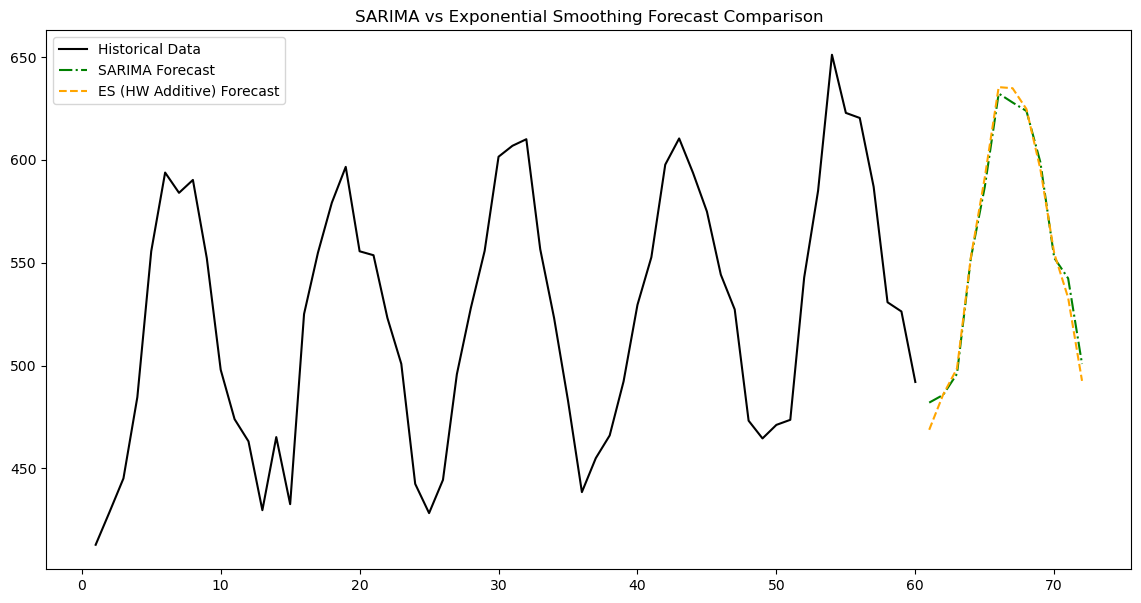

In [ ]:
# 12. Select Best ES Model & Forecast 12 Months Ahead
best_es_model_name = es_comparison_df.loc[es_comparison_df['AIC'].idxmin(), 'Model']
print(f"Best ES Model selected based on AIC: {best_es_model_name}")


best_model_es = es_models[best_es_model_name]
es_forecast_test = best_model_es.forecast(steps=12)

es_test_rmse = np.sqrt(mean_squared_error(energy_data, best_model_es.forecast(steps=len(energy_data))))
print(f"Best ES Model ({best_es_model_name}) RMSE on Test Set: {es_test_rmse:.2f}")

# 13. Future Forecast (12 Months) with Best ES Model (Refit on Full Data)
if best_es_model_name == 'Simple ES':
    final_es = ExponentialSmoothing(energy_data, trend=None, seasonal=None).fit()
elif best_es_model_name == "Holt's Linear":
    final_es = ExponentialSmoothing(energy_data, trend='add', seasonal=None).fit()
elif best_es_model_name == "HW Additive":
    final_es = ExponentialSmoothing(energy_data, trend='add', seasonal='add', seasonal_periods=12).fit()
elif best_es_model_name == "HW Multiplicative":
    final_es = ExponentialSmoothing(energy_data, trend='add', seasonal='mul', seasonal_periods=12).fit()

es_future_forecast = final_es.forecast(steps=12)

# Visual Comparison: Historical, SARIMA Forecast, ES Forecast
plt.figure(figsize=(14, 7))
plt.plot(range(1,61), energy_data.values, label='Historical Data', color='black')
# Plot Test Set prediction comparison
plt.plot(range(61,73), sarima_forecast.values, label='SARIMA Forecast', linestyle='-.', color='green')
plt.plot(range(61,73), es_forecast_test.values, label=f'ES ({best_es_model_name}) Forecast', linestyle='--', color='orange')

plt.legend()
plt.title('SARIMA vs Exponential Smoothing Forecast Comparison')
plt.show()